<h2 align='center' style='color:blue'>Exercise: Outlier removal using standard deviation and z score<h2>

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe. 

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [2]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


We will quickly examine price_per_sqft column to check min,max,mean and percentile values

In [3]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score

Also **plot histogram** to see how is the data distribution

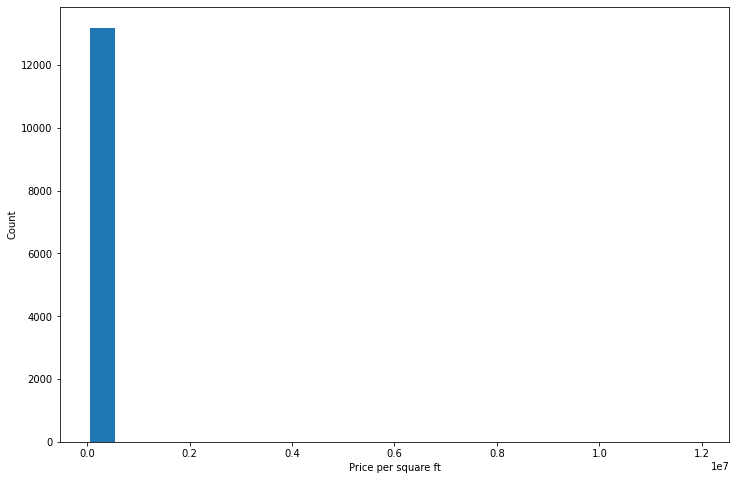

In [4]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using **log scale** can make visualization little better

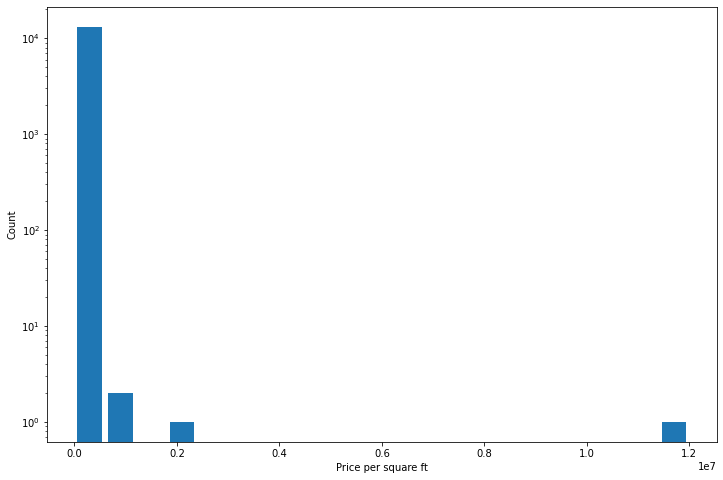

In [5]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

You see atleast few bars on right hand side of our highest building at least :)

<h3 style='color:purple'>(1) Treat outliers using percentile first</h3>

In [6]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [7]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1166
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
7012,other,1 BHK,650.0,1.0,500.0,1,76923
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
5343,other,9 BHK,42000.0,8.0,175.0,9,416
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371


Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) 
Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [8]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [9]:
df.shape

(13200, 7)

In [10]:
df.shape[0] - df2.shape[0]

28

**We removed total 28 outliers**

<h3 style='color:purple'>(2) Now remove outliers using 4 standard deviation</h3>

In [11]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589432, -9900.429065502582)

In [12]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
4638,Munnekollal,43 Bedroom,2400.00,40.0,660.0,43,27500
6391,other,5 Bedroom,4000.00,4.0,1000.0,5,25000
6709,Malleshwaram,4 Bedroom,4000.00,4.0,1100.0,4,27500
45,HSR Layout,8 Bedroom,600.00,9.0,200.0,8,33333
12640,other,3 BHK,2777.29,5.0,649.0,3,23368
12352,other,6 Bedroom,2400.00,5.0,750.0,6,31250
1721,other,5 Bedroom,2400.00,5.0,625.0,5,26041
8082,Nagarbhavi,4 Bedroom,1200.00,3.0,340.0,4,28333
2825,HBR Layout,9 Bedroom,1200.00,6.0,280.0,9,23333
978,Rajaji Nagar,4 Bedroom,315.00,4.0,90.0,4,28571


In [13]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [14]:
df2.shape[0] - df3.shape[0]

125

In this step we removed total 125 outliers

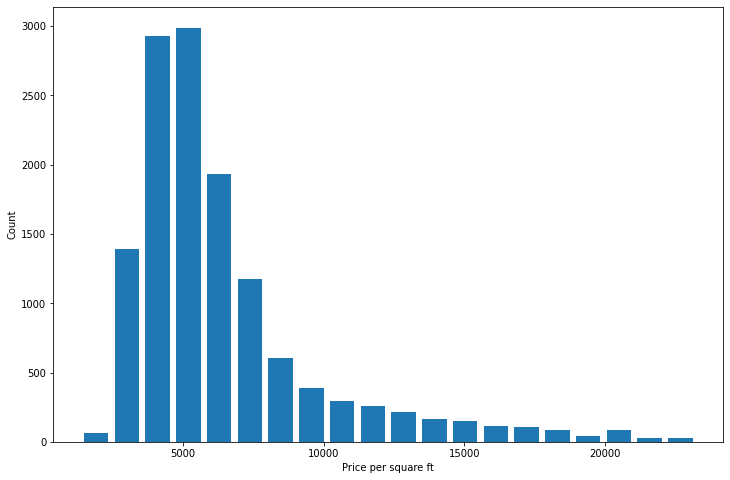

In [15]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

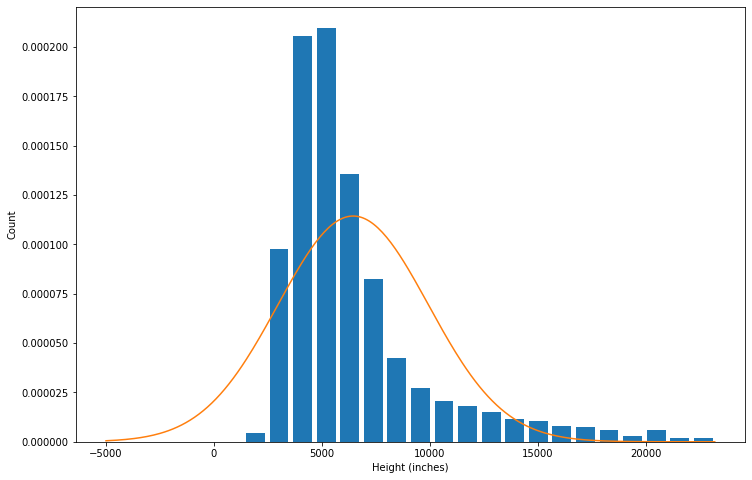

In [16]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

<h3 style='color:purple'>(3) Now remove outliers using z score. Use z score of 4 as your thresold</h3>

In [17]:
df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean()) / df2.price_per_sqft.std()
df2.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
5244,Hennur Road,2 BHK,1359.0,2.0,104.00,2,7652,0.238672
6174,Marathahalli,3 BHK,1680.0,3.0,105.00,3,6250,-0.099892
1868,Kengeri,2 BHK,726.0,2.0,31.00,2,4269,-0.578276
4737,Sarjapur Road,3 BHK,1750.0,3.0,99.00,3,5657,-0.243093
8650,HAL 2nd Stage,4 Bedroom,2400.0,4.0,650.00,4,27083,4.930994
10588,TC Palaya,2 Bedroom,900.0,2.0,55.00,2,6111,-0.133458
2765,Electronic City,3 BHK,880.0,2.0,18.00,3,2045,-1.115342
4330,Begur Road,2 BHK,1160.0,2.0,42.92,2,3700,-0.715682
7275,Begur Road,2 BHK,1200.0,2.0,44.40,2,3700,-0.715682
3011,Kaggadasapura,2 BHK,1100.0,2.0,58.00,2,5272,-0.336065


In [18]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore > 4)]
outliers_z.shape

(125, 8)

In [19]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9099,Whitefield,3 BHK,1496.0,2.0,718.0,3,47994,9.980715
1721,other,5 Bedroom,2400.0,5.0,625.0,5,26041,4.679365
8083,other,3 BHK,2750.0,3.0,943.0,3,34290,6.671386
5315,Banashankari Stage II,4 Bedroom,1500.0,2.0,650.0,4,43333,8.855147
5654,other,4 Bedroom,4920.0,5.0,1150.0,4,23373,4.035079


In [20]:
df4 = df2[(df2.zscore > -4) & (df2.zscore < 4)]
df4.shape

(13047, 8)

In [21]:
df2.shape[0] - df4.shape[0]

125

In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation